# PCA from Scratch  


In [1]:
import numpy as np 

class PCA:
    def __init__(self, n_components) -> None:
        self.n_components = n_components
        self.components = None
        self.mean = None
    
    def fit(self, X):
        # Center the data.
        self.mean = np.mean(X, axis=0)
        X = X - self.mean
        
        # Compute the covariance matrix
        cov = np.cov(X, rowvar=False)
        
        # Compute the eigenvalues and eigenvectors of the covariance matirx
        eigenvalues, eigenvectors = np.linalg.eigh(cov)
        
        # Sort the eigenvalus and eigenvectors in descending order
        idx = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]
        
        # Store the first n_components eigenvectors as the principal components
        self.components = eigenvectors[:, : self.n_components]
        
    def transform(self, X):
        # center the data
        X = X - self.mean
        
        # project the data onto the principal components
        x_transformed = np.dot(X, self.components)
        
        return x_transformed

## Example Data - Wine

In [6]:
import matplotlib.pyplot as plt 
from sklearn.datasets import load_wine, load_iris

# load dataset
wine_data = load_wine()
X, y = wine_data['data'], wine_data['target']

print(X.shape)
print(y.shape)

(178, 13)
(178,)


## Plotting Raw Data - Wine

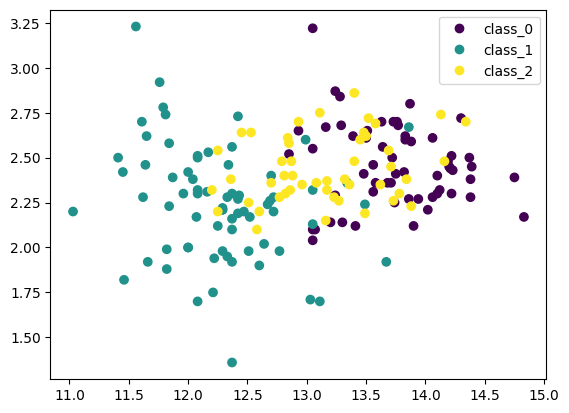

In [7]:
plot = plt.scatter(X[:,0], X[:,2], c=y)

plt.legend(handles=plot.legend_elements()[0],
           labels=list(wine_data['target_names']))

plt.show()

# Applying PCA on raw data

In [5]:


# Create a PCA object with 2 components
pca = PCA(n_components=2)

# fit the data
pca.fit(X)

# Transform the data using the PCA object
X_transformed = pca.transform(X)

print(X_transformed.shape)

(178, 2)


# Plotting PCA Results

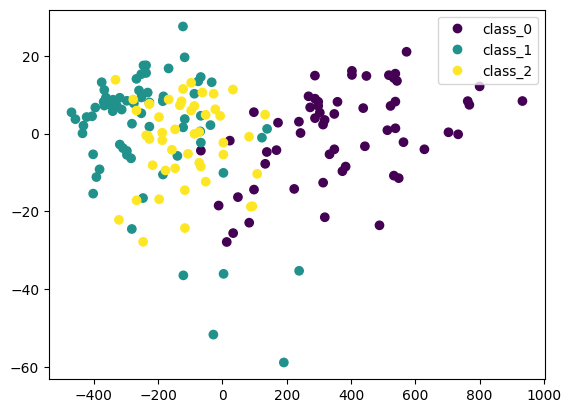

In [9]:
plot = plt.scatter(X_transformed[:,0], X_transformed[:,1], c=y)

plt.legend(handles=plot.legend_elements()[0],
           labels=list(wine_data['target_names']))

plt.show()

# PCA is sensitive to scale! Normalising data can help! 

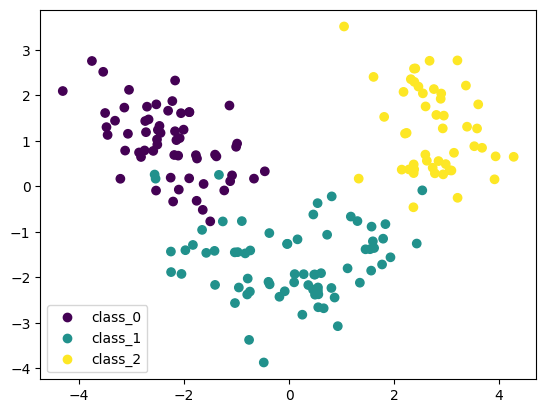

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Normalise the data
scaler = StandardScaler()
scaler.fit(X)
X_normalized = scaler.transform(X)

# Apply PCA on normalised data
pca.fit(X_normalized)

# Transform the data using the PCA object
X_transformed = pca.transform(X_normalized)

plot = plt.scatter(X_transformed[:,0], X_transformed[:,1], c=y)

plt.legend(handles=plot.legend_elements()[0],
           labels=list(wine_data['target_names']))

plt.show()